In [63]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [64]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [65]:
train_images.shape

(60000, 28, 28)

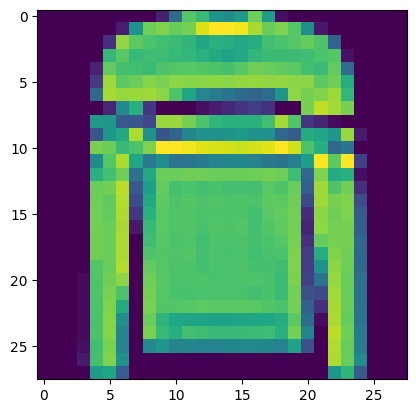

In [66]:
plt.imshow(train_images[5])

In [67]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [68]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [69]:
train_labels[12]

5

In [70]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Modelo de datos

In [71]:
# Definir el modelo secuencial
model = tf.keras.Sequential()

# Añadir la capa de entrada explícita
model.add(Input(shape=(28, 28, 1)))  # Definir explícitamente la capa de entrada

# Añadir las capas convolucionales y densas
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

## Compilar - entrenar

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
               metrics=['accuracy']                
              )

In [73]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6939 - loss: 0.8176
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8525 - loss: 0.4134
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8721 - loss: 0.3552
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8798 - loss: 0.3349
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8854 - loss: 0.3215
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8896 - loss: 0.3076
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8903 - loss: 0.3033
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8938 - loss: 0.2964
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8923 - loss: 0.2981
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2895


In [74]:
score = model.evaluate(test_images, test_labels, verbose=0)

In [75]:
score

[0.37594547867774963, 0.8758999705314636]

In [76]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
model.fit(train_images, 
          train_labels, 
          batch_size=64,
          callbacks=[early],
          epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8976 - loss: 0.2891
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8982 - loss: 0.2882
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8999 - loss: 0.2804


In [77]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.keras',
                                  verbose=1,
                                  monitor='accuracy',
                                  save_best_only=True)
model.fit(train_images, 
          train_labels, 
          batch_size=64,
          callbacks=[checkpoint],
          epochs=10)

Epoch 1/10
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2797
Epoch 1: accuracy improved from -inf to 0.90012, saving model to mi_primer_red_conv.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9018 - loss: 0.2797
Epoch 2/10
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: 0.2841
Epoch 2: accuracy improved from 0.90012 to 0.90105, saving model to mi_primer_red_conv.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8988 - loss: 0.2840
Epoch 3/10
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.2796
Epoch 3: accuracy did not improve from 0.90105
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9006 - loss: 0.2796
Epoch 4/10
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9031 - loss: 0.2743
Epoch 4: accuracy improved from 0.90105 to 0.90290, saving model to mi_primer_red_conv.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9031 - loss: 0.2743
Epoch 5/10
922/938 ━━━━━━━━━━━━━━

In [78]:
model2 = model
model2.load_weights('/kaggle/working/mi_primer_red_conv.keras')

In [79]:
model2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9081 - loss: 0.2784


[0.278730571269989, 0.9049999713897705]